# Assignment 6: Building Machine Learning Models with Scikit-learn

This notebook contains solutions for three problems:

1. Classification on the Iris dataset
2. K-Means clustering on the Wine dataset
3. Linear Regression on the California Housing dataset

Run each cell sequentially.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set_style('whitegrid')


## Problem 1: Classification on the Iris Dataset

Load Iris from seaborn, split, train models (KNN, GaussianNB, DecisionTree, RandomForest, SVM), show predictions and confusion matrices.

In [2]:
iris = sns.load_dataset('iris')
df_iris = iris.copy()
X = df_iris.drop(columns='species')
y = df_iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=False, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    acc = accuracy_score(y_test, y_pred)
    print(f"=== {name} ===")
    print('Predicted labels:')
    print(y_pred)
    print('\nActual labels:')
    print(y_test.values)
    print('\nConfusion matrix (rows=true, cols=pred):')
    print(pd.DataFrame(cm, index=model.classes_, columns=model.classes_))
    print(f"Accuracy: {acc:.4f}\n\n")


=== KNN ===
Predicted labels:
['setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica'
 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa']

Actual labels:
['setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica'
 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa']

Confusion matrix (rows=true, cols=pred):
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0          10          0
virginica        0           0         10
Accuracy: 1.0000


=== GaussianNB ===
Predicted labe

## Problem 2: K-Means Clustering on the Wine Dataset

Load Wine from sklearn, preprocess, KMeans with k = number of classes, print cluster labels, compute clustering accuracy after mapping, and visualize.

First 30 cluster labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Clustering accuracy (after mapping): 0.9662921348314607


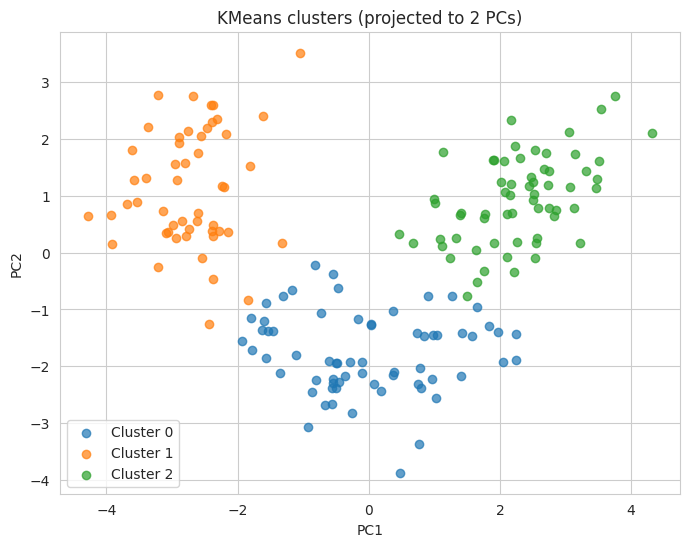

In [7]:
from sklearn.datasets import load_wine
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

from sklearn.preprocessing import StandardScaler
features = wine.feature_names
X_wine = df_wine[features].values
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)
y_wine = df_wine['target'].values

k = len(np.unique(y_wine))
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_wine_scaled)
cluster_labels = kmeans.labels_
print('First 30 cluster labels:')
print(cluster_labels[:30])

from scipy.stats import mode
label_mapping = {}
for cluster in np.unique(cluster_labels):
    mask = (cluster_labels == cluster)
    most_common = mode(y_wine[mask], keepdims=True).mode[0]
    label_mapping[cluster] = most_common
mapped_labels = np.array([label_mapping[c] for c in cluster_labels])
clustering_accuracy = accuracy_score(y_wine, mapped_labels)
print('Clustering accuracy (after mapping):', clustering_accuracy)

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_wine_scaled)
plot_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
plot_df['cluster'] = cluster_labels
plot_df['target'] = y_wine

plt.figure(figsize=(8,6))
for cl in np.unique(cluster_labels):
    subset = plot_df[plot_df['cluster']==cl]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cl}', alpha=0.7)
plt.legend()
plt.title('KMeans clusters (projected to 2 PCs)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## Problem 3: Linear Regression on the California Housing Dataset

Load dataset, preprocess, split, train LinearRegression, evaluate (MSE, R2), and print coefficients.

In [4]:
from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing(as_frame=True)
df_cal = cal.frame.copy()

print('Missing values per column:')
print(df_cal.isnull().sum())

X_cal = df_cal.drop(columns='MedHouseVal')
y_cal = df_cal['MedHouseVal']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cal, y_cal, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train_c, y_train_c)
y_pred_c = lr.predict(X_test_c)
mse = mean_squared_error(y_test_c, y_pred_c)
r2 = r2_score(y_test_c, y_pred_c)
print(f'MSE: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

coef_df = pd.DataFrame({'feature': X_cal.columns, 'coefficient': lr.coef_}).sort_values(by='coefficient', key=abs, ascending=False)
coef_df


Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
MSE: 0.5559
R-squared: 0.5758


,feature,coefficient
3,AveBedrms,0.783145
0,MedInc,0.448675
7,Longitude,-0.433708
6,Latitude,-0.419792
2,AveRooms,-0.123323
1,HouseAge,0.009724
5,AveOccup,-0.003526
4,Population,-0.000002
